### Student Information
Name: Cedric Cyril CHAUVOT

Student ID: X1140010

GitHub ID: CedricCVT

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [280]:
### Begin Assignment Here

In [281]:
# test code for environment setup
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
# If you get "ModuleNotFoundError: No module named 'PAMI'"
# run the following in a new Jupyter cell:
# !pip3 install PAMI
import PAMI
import umap


import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Step X

In [282]:
# Import of the new dataset with pandas built in function to import csv
df = pd.read_csv('Reddit-stock-sentiment.csv')

# Display the columns
print(df.columns)

#display the first 5 lines
df.head()


Index(['type', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url',
       'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity',
       'polarity', 'sentiment', 'entities', 'label'],
      dtype='object')


,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0


In [283]:
'''
- we are just going to keep the text, and the label. (we assume we can skip the title as more data will be in the text, and that sonetimes the title of reddit post can be ironic)
- we are going to add a column "label_name" for more readable plots. ("label_name" values can be "neutral","positive","negative", whether the label is 0, 1 or -1)
'''
df=df[['text', 'label']]

# Mapping and creating the "label_name" column :
label_map = {
    1: 'positive',
    -1: 'negative',
    0: 'neutral'
}
df['label_name'] = df['label'].map(label_map)

df.head()

,text,label,label_name
0,Calls on retards,-1.0,negative
1,Stunt as in like why did they even make a big ...,0.0,neutral
2,Seeing lots of red in the ticker.,0.0,neutral
3,Vision Marine Technologies Inc. is rewriting t...,1.0,positive
4,He didn’t say thank you.,-1.0,negative


In [284]:
# checking for null values
df.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,label,label_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [285]:
# No null value in text or label, what a perfect world !

# checking for duplicated values :
sum(df.duplicated()), len(df)

(23, 847)

In [286]:
# There are 23 duplicated values (so same text & label) out of 847 lines. We thus drop the 23 duplicates :

df.drop_duplicates(keep=False, inplace=True)

In [287]:
sum(df.duplicated()), len(df) # now have 0 duplicates

(0, 813)

label_name
neutral     391
negative    315
positive    107
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='label_name'>

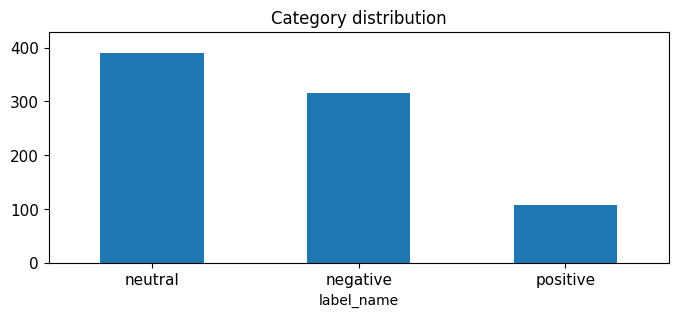

In [288]:
print(df.label_name.value_counts())

# plot barchart for df
df.label_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, df.label_name.value_counts().max()*1.1],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

### Here, we observe that most of the data is neutral (~50%), and we have about 3 times more data with negative label than positive label (~13% vs ~37%, welcome to social medias !)
This means we might have to sample to get equivalent proportions of the 3 labels (in order to avoid a negative label bias)
However if we proceed, it means we have to keep the 107 positive labels, and randomly pick 107 neutral and 107 negative, thus dropping 492 records (=half the total dataset, probably too much) but for the sake of practicing let's still create a sampled dataframe !!

label_name
negative    107
neutral     107
positive    107
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='label_name'>

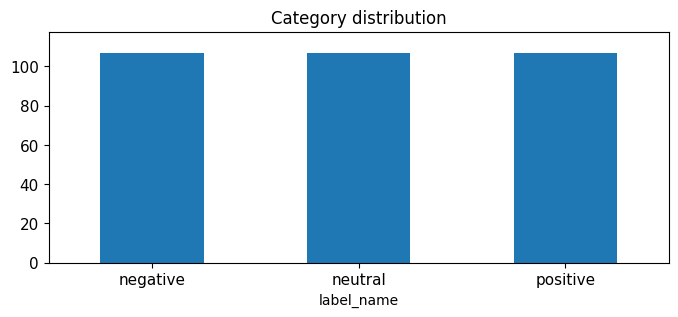

In [289]:
# Creating an equally sampled dataframe
df_sampled = df.groupby('label').sample(n=107, random_state=42)

print(df_sampled.label_name.value_counts())

# plot barchart for df_sampled
df_sampled.label_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, df_sampled.label_name.value_counts().max()*1.1],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

### Exercise 8 
Comparing the original dataset vs the sampled one

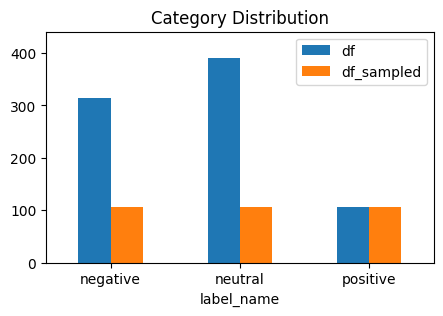

In [290]:
counts = pd.DataFrame({ 'df': df.label_name.value_counts(), 'df_sampled':df_sampled.label_name.value_counts() })

counts.plot(kind='bar', figsize=(5, 3), rot=0, fontsize=10, title='Category Distribution')
plt.ylim(0, counts.max().max() + 50)
plt.show()



#### Feature Creation

In [291]:
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [292]:

df['unigrams'] = df['text'].apply(lambda x: dmh.tokenize_text(x))

df[0:4]["unigrams"]

0                                 [Calls, on, retards]
1    [Stunt, as, in, like, why, did, they, even, ma...
2          [Seeing, lots, of, red, in, the, ticker, .]
3    [Vision, Marine, Technologies, Inc., is, rewri...
Name: unigrams, dtype: object

In [293]:
# showing the new column "unigrams" of the df :
df.head()

,text,label,label_name,unigrams
0,Calls on retards,-1.0,negative,"[Calls, on, retards]"
1,Stunt as in like why did they even make a big ...,0.0,neutral,"[Stunt, as, in, like, why, did, they, even, ma..."
2,Seeing lots of red in the ticker.,0.0,neutral,"[Seeing, lots, of, red, in, the, ticker, .]"
3,Vision Marine Technologies Inc. is rewriting t...,1.0,positive,"[Vision, Marine, Technologies, Inc., is, rewri..."
4,He didn’t say thank you.,-1.0,negative,"[He, didn, ’, t, say, thank, you, .]"


### 5.3 Feature subset selection

In [294]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.text) #learn the vocabulary and return document-term matrix
print(df_counts[0])

  (np.int32(0), np.int32(689))	1
  (np.int32(0), np.int32(2682))	1
  (np.int32(0), np.int32(3220))	1


### **>>> Exercise 9:**

In [295]:
analyze = count_vect.build_analyzer()
analyze(df.text[1]) 

#NB : I printed the 2nd one (index 1) because the first one containd a politically-incorrect word

['stunt',
 'as',
 'in',
 'like',
 'why',
 'did',
 'they',
 'even',
 'make',
 'big',
 'deal',
 'about',
 'starting',
 'it',
 'in',
 'the',
 'first',
 'place',
 'no',
 'company',
 'should',
 'ever',
 'talk',
 'about',
 'politics',
 'ever']

In [296]:
df_counts.shape

(813, 4313)

In [297]:
df_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

### Exercice 10

Above, we can see that the only non-zero value is the 4th document, and has a value of 3 in df_counts. Let's find it :

In [298]:

fourth_doc_df_count=df_counts[0:5, 0:100].toarray()[3] # we want to explore the fourth document (the 4rd line of the df_count matrix)

matrix_elements_non_zero_in_fourth_doc = [] # list of our elements with value >= 1 in df_count
for k in range(0,100): 
    if fourth_doc_df_count[k] >= 1 : # we look at the X_counts matrix to catch every element ==1
        matrix_elements_non_zero_in_fourth_doc.append(count_vect.get_feature_names_out()[k]) # we addd them to the list when their value in the df_count matrix is >= to 1

print(matrix_elements_non_zero_in_fourth_doc[0]) # we print the 1st value that has a count >=1 in the df_count matrix 

116


### Exercice 11

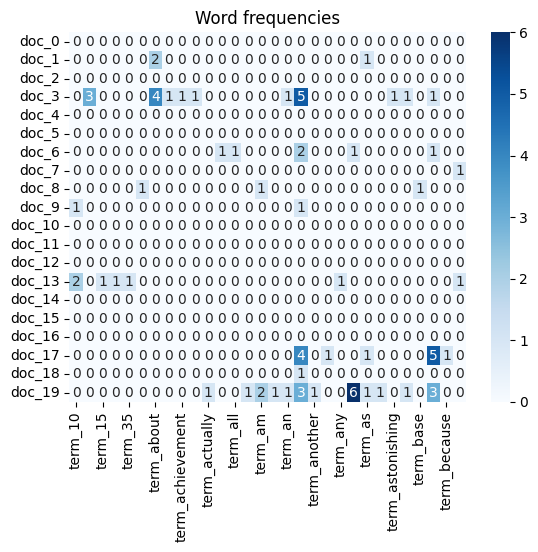

In [299]:
import seaborn as sns

'''
We are going to remove every term who doesnt appear in any of the chosen documents
'''

#chose docs and number of terms
n_doc = 20
n_terms = 30

doc_names = ["doc_"+ str(i) for i in range(n_doc)]
frequency = df_counts[0:n_doc, :].toarray()

# find words that appear at least once
words_that_appear = np.where(frequency.sum(axis=0)>0)[0]
top_words_idx = words_that_appear[:n_terms]

# get word names and data
top_words = ["term_"+str(count_vect.get_feature_names_out()[i]) for i in top_words_idx]
top_word_data = frequency[:, top_words_idx]

#create df for heatmap and plot
df_heatmap = pd.DataFrame(top_word_data, columns=top_words, index=doc_names)
sns.heatmap(df_heatmap, cmap="Blues", annot=True)
plt.title("Word frequencies")
plt.show()

### 5.4 Attribute Transformation / Aggregation

In [300]:
term_frequencies = []
for j in range(0,df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:,j].toarray()))

In [301]:
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

In [302]:
# lets check the first value 
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

In [303]:
term_frequencies[0] #sum of first term: 00
#    =4

np.int64(4)

C:\Users\User\AppData\Local\Temp\ipykernel_22876\3480579971.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



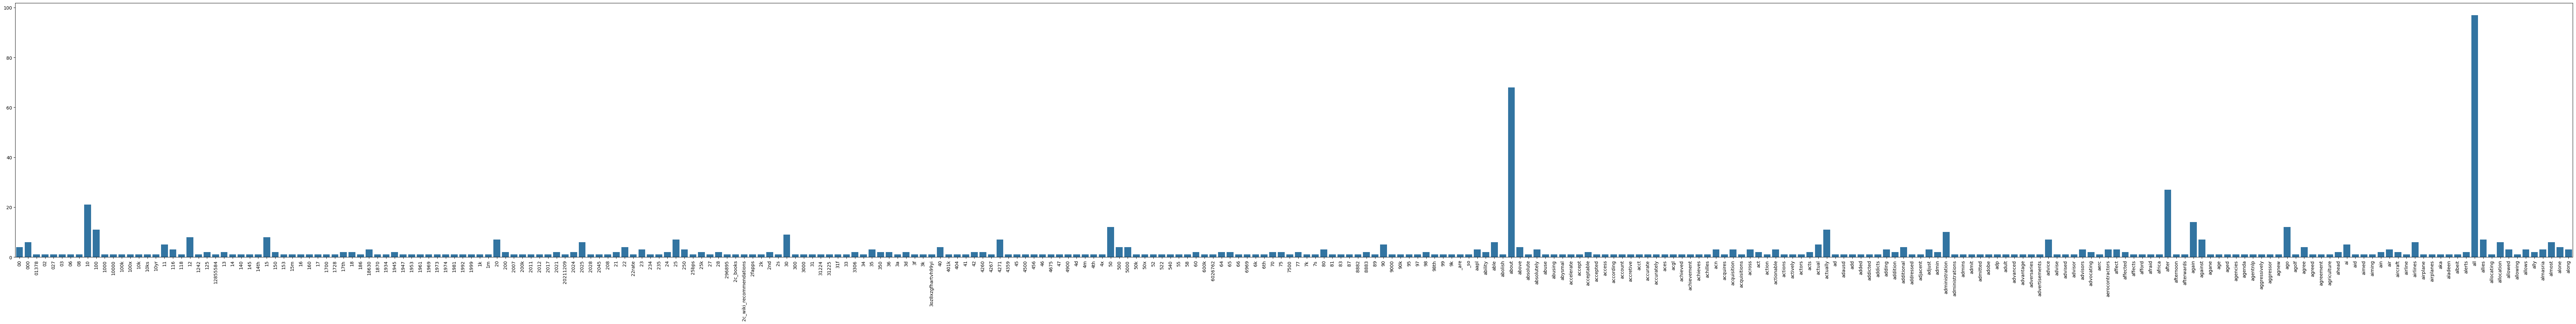

In [304]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

### >>> **Exercise 12 (take home):**

In [305]:
import plotly.express as pyex

# Create DataFrame for Plotly
n = 100
df1 = pd.DataFrame({ 'term': count_vect.get_feature_names_out()[:n], 'frequency': term_frequencies[:n]})

#plot with plotly
fig = pyex.bar(df1, 
             x='frequency', 
             y='term',
             title='Frequency of the first 100 terms (interactive : the term is displayed when you put your mouse!!)',
             color='frequency',
             color_continuous_scale='viridis') 

fig.show()

### >>> **Exercise 13 (take home):** 

In [306]:
n = 10 # we just changed the value of n
df1 = pd.DataFrame({ 'term': count_vect.get_feature_names_out()[:n], 'frequency': term_frequencies[:n]})

#plot with plotly
fig = pyex.bar(df1, 
             x='frequency', 
             y='term',
             title='Frequency of the first 10 terms (interactive : the term is displayed when you put your mouse!!)',
             color='frequency',
             color_continuous_scale='viridis') 

fig.show()

### >>> **Exercise 14 (take home):** 

In [307]:
# Answer here
n=100 # how many terms we want to display

# lets create a sorted dataframe
df2 = pd.DataFrame({ 'term': count_vect.get_feature_names_out(), 'frequency': term_frequencies})
df2_sorted = df2.sort_values('frequency', ascending=False).head(n)

# plot
fig = pyex.bar(df2_sorted, 
                         x='term', 
                         y='frequency', 
                         title='Long tail of the terms',
                         color='frequency',
                         color_continuous_scale='viridis')
fig.show()

In [308]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

C:\Users\User\AppData\Local\Temp\ipykernel_22876\2166548998.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



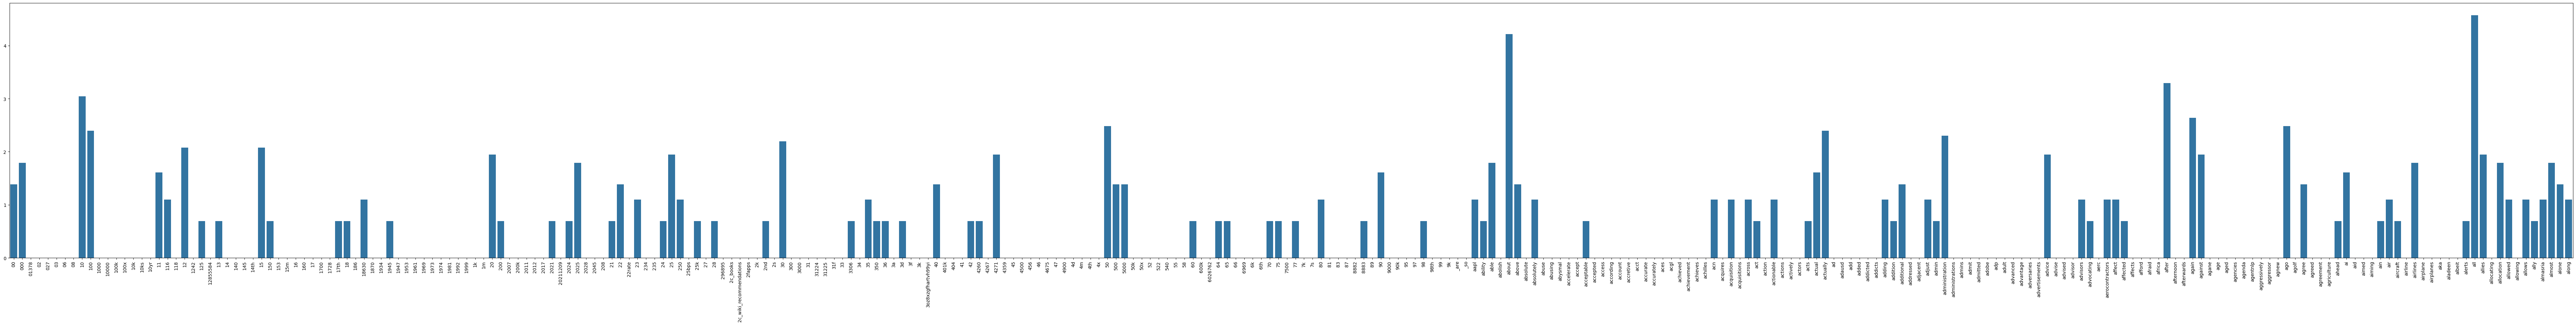

In [309]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

### >>> **Exercise 15 (take home):** 

In [310]:
# Answer here

n=100 # how many terms we want to display
df3 = pd.DataFrame({ 'term': count_vect.get_feature_names_out(), 'log of frequency': term_frequencies_log})
df3_sorted = df3.sort_values('log of frequency', ascending=False).head(n)

# One-line plot
fig = pyex.bar(df3_sorted, 
                         x='term', 
                         y='log of frequency', 
                         title='Long tail of the terms',
                         color='log of frequency',
                         color_continuous_scale='viridis')
fig.show()

'''
we can observe that :
- the y scale has been reduced : from 0-30k to 0-10, 
    - Makes it easier for the mind to compare
- the arithmetic difference between the values are now manageable : now, the smaller values are not graphically shrinked anymore into oblivion because of the big values.
    - We can thus observe the long tail in more details
'''

'\nwe can observe that :\n- the y scale has been reduced : from 0-30k to 0-10, \n    - Makes it easier for the mind to compare\n- the arithmetic difference between the values are now manageable : now, the smaller values are not graphically shrinked anymore into oblivion because of the big values.\n    - We can thus observe the long tail in more details\n'

### New meaningful visualizations on the new dataset :

In [311]:
'''
New viz : the words that have the highest label proportions for each label value, and that have multiple apparitions (to avoid 1-hit-wonder irrevelant features)
Lets create a new dataset who
'''

all_tokens = df['unigrams']

# we create new dataframe with tokens and labels proportionns
exploded_data = []
for i, row in df.iterrows():
    for token in row['unigrams']:
        exploded_data.append({
            'token': token,
            'label': row['label']  
        })

exploded_df = pd.DataFrame(exploded_data)

# calculate proportions for each token
result = exploded_df.groupby('token')['label'].value_counts(normalize=True).unstack(fill_value=0)

# Clean up to get exactly 4 columns
result = result.reset_index()
result.columns = ['token', 'negative', 'neutral', 'positive'] 

print(result)

     token  negative   neutral  positive
0        !  0.426471  0.411765  0.161765
1        #  0.264151  0.698113  0.037736
2        $  0.075949  0.873418  0.050633
3        %  0.239316  0.589744  0.170940
4        &  0.128205  0.666667  0.205128
...    ...       ...       ...       ...
5093     ‘  0.333333  0.666667  0.000000
5094     ’  0.474654  0.400922  0.124424
5095     “  0.413793  0.482759  0.103448
5096     ”  0.444444  0.444444  0.111111
5097    €5  0.000000  0.000000  1.000000

[5098 rows x 4 columns]


In [312]:
# to plot 
result['apparitions'] = result['token'].map(exploded_df.groupby('token').size())

# Filter and display
filtered = result[result['apparitions'] > 10]

for label in ['positive', 'negative', 'neutral']:
    print(f"=== TOP 10 {label.upper()} TOKENS (>10 apparitions) ===")
    top_tokens = filtered.nlargest(10, label)[['token', label, 'apparitions']]
    print(top_tokens)
    print()

=== TOP 10 POSITIVE TOKENS (>10 apparitions) ===
           token  positive  apparitions
4625  technology  0.916667           12
3147    industry  0.416667           12
2008       calls  0.363636           11
246            :  0.355932           59
4346      silver  0.315789           19
2893        good  0.297297           37
2449       doing  0.290323           31
906         Just  0.285714           14
1702        also  0.285714           21
3375     looking  0.285714           14

=== TOP 10 NEGATIVE TOKENS (>10 apparitions) ===
          token  negative  apparitions
3870  president  0.769231           13
3814      point  0.764706           17
3018        his  0.755556           45
4733      trade  0.750000           20
2512    economy  0.739130           23
4304       shit  0.733333           15
2606       ever  0.727273           11
1566         Xi  0.722222           18
4919      wants  0.722222           18
789          He  0.718750           32

=== TOP 10 NEUTRAL TOKENS (>10 

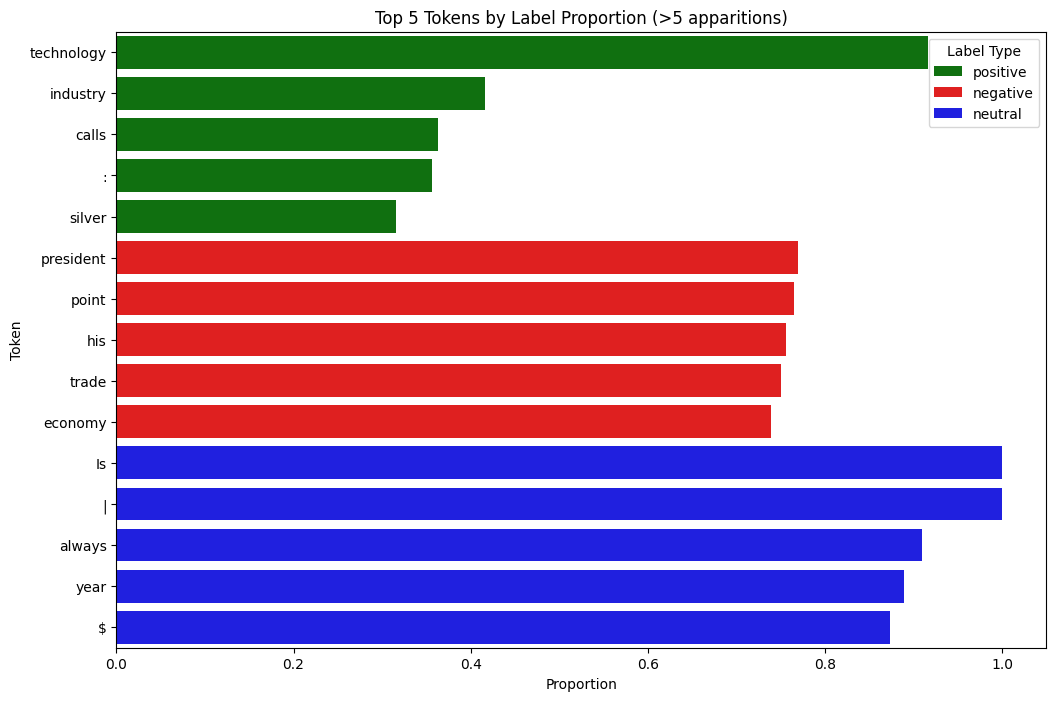

In [ ]:
# data in order to plot
plot_data = []
for label in ['positive', 'negative', 'neutral']:
    top_tokens = filtered.nlargest(5, label)[['token', label]]
    top_tokens['label_type'] = label
    top_tokens = top_tokens.rename(columns={label: 'proportion'})
    plot_data.append(top_tokens)

combined_data = pd.concat(plot_data)

# combined plot
plt.figure(figsize=(12, 8))
sns.barplot(data=combined_data, x='proportion', y='token', hue='label_type', 
            palette={'positive': 'green', 'negative': 'red', 'neutral': 'blue'})
plt.title('Top 5 Tokens by Label Proportion (>5 apparitions)')
plt.xlabel('Proportion')
plt.ylabel('Token')
plt.legend(title='Label Type')
plt.show()

# Phase 2

In [279]:
### Begin Assignment Here